## Линейная модель

Линейная модель - это математическая модель, используемая в машинном обучении для предсказания значений на основе линейной комбинации входных признаков. Она предполагает, что выходное значение (прогноз) можно выразить как взвешенную сумму входных признаков с добавлением смещения (bias). Математически это можно записать следующим образом:


$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$

где:
- $\hat{y}$ - прогнозируемое значение,
- $w_1, w_2, \ldots, w_n$ - веса (параметры) модели для каждого признака,
- $x_1, x_2, \ldots, x_n$ - входные признаки,
- $b$ - смещение (bias).

### Вычисление выхода линейной модели

Для вычисления выхода линейной модели, просто подставьте значения признаков в уравнение, используя соответствующие веса и смещение. Матричная формула для вычисления выхода линейной модели для набора данных \(X\) выглядит следующим образом:

$\hat{Y} = X \cdot \mathbf{w} + b$

где:
- $\hat{Y}$ - вектор прогнозов для всего набора данных,
- $X$ - матрица признаков, где каждая строка представляет один образец, а столбцы - признаки,
- $\mathbf{w}$ - вектор весов модели,
- $b$ - смещение (bias).

### Обучение линейной модели

Обучение линейной модели заключается в настройке параметров (весов и смещения) так, чтобы они наилучшим образом соответствовали обучающим данным. Одним из наиболее распространенных методов обучения линейной модели является градиентный спуск.

### Градиентный спуск

Градиентный спуск - это метод оптимизации, используемый для обновления параметров модели с целью минимизации функции потерь. Функция потерь оценивает, насколько хорошо модель предсказывает реальные значения на обучающих данных.

Для линейной регрессии, часто используется среднеквадратичная ошибка (Mean Squared Error - MSE) в качестве функции потерь:

$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - реальное значение для i-го примера,
- $\hat{y}_i$ - прогнозированное значение для i-го примера.

### Корректировка весов модели

Для обновления весов модели в методе градиентного спуска, используется градиент функции потерь по отношению к параметрам модели. Градиент показывает направление наибольшего увеличения функции потерь, поэтому мы двигаемся в противоположном направлении градиента, чтобы уменьшить потери. Формула для обновления весов выглядит следующим образом:

$\mathbf{w}_{\text{новые}} = \mathbf{w}_{\text{старые}} - \text{learning_rate} \cdot \nabla L$

где:
- $\mathbf{w}_{\text{новые}}$ - новые веса после обновления,
- $\mathbf{w}_{\text{старые}}$ - текущие веса,
- $\text{learning_rate}$ - скорость обучения (коэффициент, контролирующий размер шага градиентного спуска),
- $\nabla L$ - градиент функции потерь по параметрам модели.

Этот процесс повторяется до достижения сходимости или определенного числа итераций.

## Классификатор на линейной модели

На линейной модели можно построить и классификатор. Для этого нужно выход линейной модели отбразить в интервал от 0 до 1. В этом нам поможет логистическая функция:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Для обучения скорректируем функцию потерь. Нетрудно показать, что функция, называемая кросс-энтропией на самом деле соответствует максимизации правдоподобия (кстати, почитайте про правдоподобие), ниже представлено выражение для нее

$BCE = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - истинная метка класса (0 или 1) для i-го примера,
- $\hat{y}_i$ - вероятность принадлежности к классу 1 для i-го примера (выход сигмоидной функции).

Будем считать, что модель относит объект к 1 классу, если ее выход $>=0.5$, иначе - 0 класс.

## Как считать градиенты

Приведу градиент для кросс-энтропии:

$\nabla_{\mathbf{w}} \text{BCE} = -\frac{1}{N} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$

Для MSE вычислить градиент самостоятельно

In [304]:
import numpy as np
import matplotlib.pyplot as plt


class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0.0

    def __call__(self, X):
        return np.dot(X,self.weights)+self.bias


class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            error = y - predictions
            gradient = 2*np.dot(X.T,error)/len(X)
            self.weights -= learning_rate*gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = ((y - predictions) ** 2).mean()
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        return self(X)


class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            sigmoid = 1/(1+np.exp(-predictions))
            error = y - sigmoid
            gradient = -np.dot(X.T,error)/len(X)
            self.weights -= learning_rate*gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        predictions = self(X)
        sigmoid = 1/(1+np.exp(-predictions))
        return np.round(sigmoid)

    def predict_proba(self, X):
        predictions = self(X)
        sigmoid = 1/(1+np.exp(-predictions))
        return sigmoid

## Проверьте модели на данных

### Линейная модель

#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:

- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [305]:
import pandas as pd

In [306]:
data = pd.read_csv('Student_Performance.csv')
print(data.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [307]:
Y = data['Performance Index']
X = data.drop(['Performance Index'],axis=1)
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes':1, 'No': 0})
X = X.to_numpy()

C:\Users\Yanturin Aygiz\AppData\Local\Temp\ipykernel_100620\818391612.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes':1, 'No': 0})


In [308]:
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [309]:
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]])

In [310]:
# Вычислите среднее по столбцам.
mean = X.mean()

# Вычислите стандартное отклонение по столбцам.
std = X.std()

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

# Нормализуйте и выходные данные
normalized_Y = (Y - Y.mean()) / Y.std()

In [311]:
normalized_X

array([[-0.37282102,  2.98676254, -0.5919243 , -0.2997866 , -0.5919243 ],
       [-0.48237266,  2.36596993, -0.62844151, -0.48237266, -0.55540709],
       [-0.33630381,  1.23393633, -0.5919243 , -0.37282102, -0.55540709],
       ...,
       [-0.40933823,  2.40248714, -0.5919243 , -0.33630381, -0.44585545],
       [-0.2997866 ,  2.91372812, -0.5919243 , -0.37282102, -0.62844151],
       [-0.37282102,  2.07383223, -0.62844151, -0.33630381, -0.5919243 ]])

In [312]:
normalized_Y

0       1.862074
1       0.508792
2      -0.532194
3      -1.000637
4       0.560842
          ...   
9995   -1.677278
9996    0.144447
9997    0.977236
9998    2.070271
9999    0.456743
Name: Performance Index, Length: 10000, dtype: float64

In [313]:
lr = LinearRegressor(num_features=normalized_X.shape[1])
history = lr.fit(normalized_X,normalized_Y)

In [314]:
lr

In [315]:
history

[np.float64(0.9999),
 np.float64(1.013912216311908),
 np.float64(1.0302579082821446),
 np.float64(1.049461504485299),
 np.float64(1.0721661011960486),
 np.float64(1.0991603180947669),
 np.float64(1.1314112317077958),
 np.float64(1.1701047620391034),
 np.float64(1.216695199130675),
 np.float64(1.2729659380158005),
 np.float64(1.3411039586451117),
 np.float64(1.423791161420495),
 np.float64(1.5243163729422193),
 np.float64(1.6467126998607982),
 np.float64(1.795925967382285),
 np.float64(1.9780212772183392),
 np.float64(2.200436311821358),
 np.float64(2.4722919640916654),
 np.float64(2.804773265927561),
 np.float64(3.2115965250023506),
 np.float64(3.709582179617171),
 np.float64(4.319357296767054),
 np.float64(5.066217053073526),
 np.float64(5.981181178116114),
 np.float64(7.10228948225022),
 np.float64(8.476190576301683),
 np.float64(10.16009013561267),
 np.float64(12.22414007719205),
 np.float64(14.754368433347295),
 np.float64(17.85627228722621),
 np.float64(21.659223828309162),
 np.fl

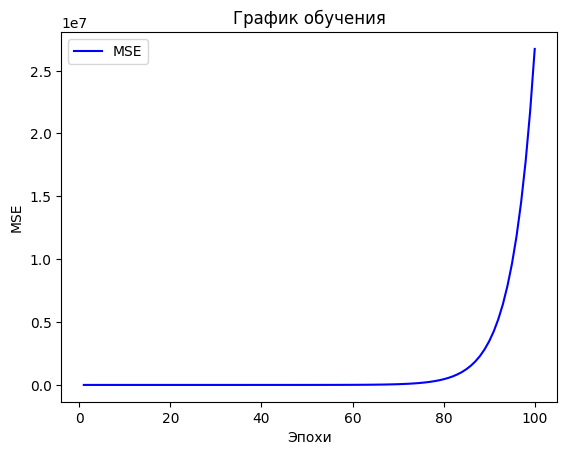

In [316]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

### Классификатор
#### Context
When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

Account Balance: No account (1), None (No balance) (2), Some Balance (3)

Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

No of Credits at this bank: 1, More than 1

Guarantor: None, Yes

Concurrent Credits: Other Banks or Dept Stores, None

ForeignWorker variable may be dropped from the study

Purpose of Credit: New car, Used car, Home Related, Other

In [317]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

In [318]:
Y = data['Creditability']
X = data.drop(['Creditability','Foreign_Worker'], axis=1)

In [291]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64

In [319]:
X

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2


In [320]:
print(data.describe())

       Creditability  Account_Balance  Duration_of_Credit_monthly  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.000000         1.000000                   12.000000   
50%         1.000000         2.000000                   18.000000   
75%         1.000000         4.000000                   24.000000   
max         1.000000         4.000000                   72.000000   

       Payment_Status_of_Previous_Credit      Purpose  Credit_Amount  \
count                         1000.00000  1000.000000     1000.00000   
mean                             2.54500     2.828000     3271.24800   
std                              1.08312     2.744439     2822.75176   
min                              0.00000     0.000000      250.00000   
25%               

In [321]:
# Вычислите среднее по столбцам.
mean = X.mean()

# Вычислите стандартное отклонение по столбцам.
std = X.std()

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

In [295]:
normalized_X

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone
0,-1.253938,-0.240737,1.343342,-0.301701,-0.787263,-0.699357,-1.145405,0.918018,-0.963168,-0.303534,1.046463,-0.340885,-1.280932,0.460600,-1.750329,-0.704573,0.146876,-0.428075,-0.822906
1,-1.253938,-0.987079,1.343342,-1.030447,-0.167301,-0.699357,-0.317800,-0.869748,0.449102,-0.303534,-0.765594,-1.293076,0.040343,0.460600,-1.750329,1.026565,0.146876,2.333701,-0.822906
2,-0.458797,-0.738298,-0.503176,2.248911,-0.860950,-0.066455,0.509805,-0.869748,-0.963168,-0.303534,1.046463,-1.293076,-1.104762,0.460600,-1.750329,-0.704573,-1.383079,-0.428075,-0.822906
3,-1.253938,-0.738298,1.343342,-1.030447,-0.407137,-0.699357,-0.317800,0.024135,0.449102,-0.303534,-0.765594,-1.293076,0.304598,0.460600,-1.750329,1.026565,-1.383079,2.333701,-0.822906
4,-1.253938,-0.738298,1.343342,-1.030447,-0.389779,-0.699357,-0.317800,0.918018,0.449102,-0.303534,1.046463,-0.340885,0.216513,-2.373863,0.135801,1.026565,-1.383079,-0.428075,-0.822906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.253938,0.256825,-0.503176,0.062672,-0.454963,-0.699357,-0.317800,-0.869748,0.449102,-0.303534,1.046463,-1.293076,-1.280932,0.460600,-1.750329,-0.704573,-1.383079,2.333701,-0.822906
996,-1.253938,0.256825,-0.503176,-1.030447,-0.343016,-0.699357,1.337409,0.918018,0.449102,1.789803,-1.671623,-1.293076,0.833108,0.460600,0.135801,-0.704573,0.146876,-0.428075,-0.822906
997,1.131486,0.008044,1.343342,-1.030447,3.333184,1.832252,1.337409,0.918018,0.449102,-0.303534,1.046463,1.563498,-0.488167,0.460600,2.021932,-0.704573,1.676831,-0.428075,1.213990
998,-0.458797,-0.738298,-0.503176,0.062672,1.132495,1.832252,-1.973010,-0.869748,0.449102,-0.303534,-1.671623,1.563498,1.449703,0.460600,0.135801,-0.704573,1.676831,-0.428075,1.213990


In [322]:
normalized_Y = (Y - Y.mean())/Y.std()

In [323]:
normalized_Y

0      0.654326
1      0.654326
2      0.654326
3      0.654326
4      0.654326
         ...   
995   -1.526761
996   -1.526761
997   -1.526761
998   -1.526761
999   -1.526761
Name: Creditability, Length: 1000, dtype: float64

In [324]:
lc = LinearClassifier(num_features=normalized_X.shape[1])
history = lc.fit(normalized_X,normalized_Y)

In [325]:
lc

In [326]:
history

[np.float64(0.6931471805599454),
 np.float64(0.6921585486063448),
 np.float64(0.691211206846674),
 np.float64(0.6903049580566932),
 np.float64(0.6894396036859005),
 np.float64(0.688614943953295),
 np.float64(0.6878307779416969),
 np.float64(0.6870869036905535),
 np.float64(0.6863831182871714),
 np.float64(0.6857192179563083),
 np.float64(0.685094998148072),
 np.float64(0.6845102536240739),
 np.float64(0.6839647785417915),
 np.float64(0.6834583665370962),
 np.float64(0.6829908108049106),
 np.float64(0.6825619041779591),
 np.float64(0.6821714392035861),
 np.float64(0.6818192082186146),
 np.float64(0.6815050034222243),
 np.float64(0.6812286169468337),
 np.float64(0.6809898409269718),
 np.float64(0.6807884675661303),
 np.float64(0.6806242892015913),
 np.float64(0.6804970983672256),
 np.float64(0.6804066878542654),
 np.float64(0.6803528507700539),
 np.float64(0.6803353805947778),
 np.float64(0.6803540712361945),
 np.float64(0.6804087170823643),
 np.float64(0.6804991130524046),
 np.float64(0

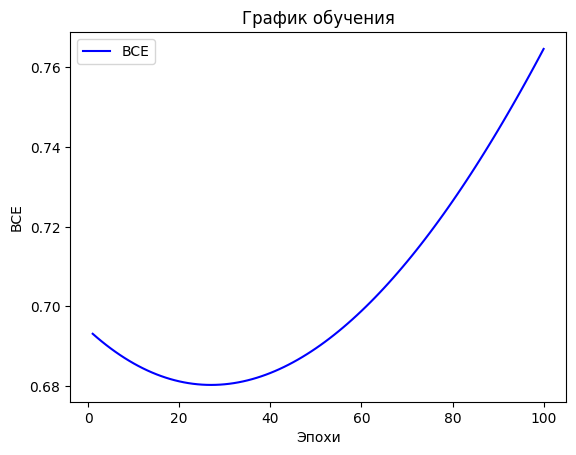

In [327]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='BCE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('BCE')
plt.legend()

# Отобразите график.
plt.show()

In [328]:
pred = lc.predict(normalized_X)
print('accuracy: ', (pred == Y).sum() / len(Y))

accuracy:  0.755


Вычислите для этой модели ROC-AUC, precision, recall и f1

In [329]:
from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score

pred = lc.predict(normalized_X)
pred_proba = lc.predict_proba(normalized_X)

roc_auc = roc_auc_score(Y,pred_proba)
precision = precision_score(Y,pred)
recall_score = recall_score(Y,pred)
f1 = f1_score(Y,pred)

print('roc_auc: ',roc_auc)
print('precision: ',precision)
print('recall_score: ',recall_score)

roc_auc:  0.793952380952381
precision:  0.7812113720642769
recall_score:  0.9028571428571428
